In [17]:
import pandas as pd



In [12]:
Salary = pd.read_csv('SalaryGender.csv')

In [13]:
Salary

,Salary,Gender,Age,PhD
0,140.0,1,47,1
1,30.0,0,65,1
2,35.1,0,56,0
3,30.0,1,23,0
4,80.0,0,53,1
...,...,...,...,...
95,18.6,1,26,0
96,152.0,1,56,1
97,1.8,1,28,0
98,35.0,0,44,0


In [14]:
Correlation = Salary.corr()


In [15]:
Correlation

,Salary,Gender,Age,PhD
Salary,1.000000,0.259312,0.477043,0.555560
Gender,0.259312,1.000000,0.160580,0.184521
Age,0.477043,0.160580,1.000000,0.353081
PhD,0.555560,0.184521,0.353081,1.000000


Text(0, 0.5, 'Salary')

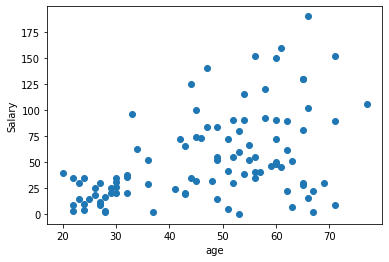

In [16]:
import matplotlib.pyplot as plt
plt.scatter(Salary.Age,Salary.Salary)
plt.xlabel('age')
plt.ylabel('Salary')

In [19]:
#Running Model on data

from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()

In [27]:
x = pd.DataFrame(Salary['Age']) #give x as a dataframe
x 
y = Salary['Salary']
y

0     140.0
1      30.0
2      35.1
3      30.0
4      80.0
      ...  
95     18.6
96    152.0
97      1.8
98     35.0
99      4.0
Name: Salary, Length: 100, dtype: float64

In [28]:
Model_Salary = lm.fit(x,y)

In [29]:
Model_Salary.intercept_

-9.304500973642376

In [30]:
Model_Salary.coef_

array([1.31887801])

In [32]:
#Making Predictions

pred_Salary = Model_Salary.predict(x)

In [33]:
pred_Salary

array([52.68276536, 76.42256949, 64.55266742, 21.02969319, 60.5960334 ,
       26.30520522, 60.5960334 , 30.26183924, 48.72613134, 73.78481347,
       19.71081518, 68.50930145, 69.82817945, 27.62408323, 76.42256949,
       23.6674492 , 76.42256949, 52.68276536, 77.7414475 , 50.04500935,
       51.36388735, 22.3485712 , 69.82817945, 73.78481347, 26.30520522,
       77.7414475 , 38.17510728, 30.26183924, 57.95827739, 76.42256949,
       50.04500935, 59.2771554 , 61.91491141, 30.26183924, 59.2771554 ,
       24.98632721, 55.32052138, 19.71081518, 35.53735127, 69.82817945,
       27.62408323, 67.19042344, 92.24910557, 79.0603255 , 26.30520522,
       54.00164337, 50.04500935, 55.32052138, 38.17510728, 76.42256949,
       32.89959525, 55.32052138, 79.0603255 , 19.71081518, 55.32052138,
       47.40725333, 71.14705746, 47.40725333, 59.2771554 , 57.95827739,
       77.7414475 , 28.94296123, 72.46593547, 64.55266742, 71.14705746,
       64.55266742, 44.76949732, 22.3485712 , 69.82817945, 47.40

In [34]:
pred_Salary.size

100

In [37]:
Predicted_salary = pd.DataFrame(pred_Salary,columns=['Predicted Salary'])

In [38]:
Predicted_salary

,Predicted Salary
0,52.682765
1,76.422569
2,64.552667
3,21.029693
4,60.596033
...,...
95,24.986327
96,64.552667
97,27.624083
98,48.726131


In [56]:
Final_Data = pd.concat([Salary.reset_index(drop=True),Predicted_salary],axis=1)

In [57]:
Final_Data

,Salary,Gender,Age,PhD,Predicted Salary
0,140.0,1,47,1,52.682765
1,30.0,0,65,1,76.422569
2,35.1,0,56,0,64.552667
3,30.0,1,23,0,21.029693
4,80.0,0,53,1,60.596033
...,...,...,...,...,...
95,18.6,1,26,0,24.986327
96,152.0,1,56,1,64.552667
97,1.8,1,28,0,27.624083
98,35.0,0,44,0,48.726131


In [63]:
#Checking Accuracy

Final_Salary1 = Final_Data
#Final_Salary1['Deviation'] = abs(Final_Salary1[4]-Final_Salary1[0])/Final_Salary1[0] 

Final_Salary1

,Salary,Gender,Age,PhD,Predicted Salary
0,140.0,1,47,1,52.682765
1,30.0,0,65,1,76.422569
2,35.1,0,56,0,64.552667
3,30.0,1,23,0,21.029693
4,80.0,0,53,1,60.596033
...,...,...,...,...,...
95,18.6,1,26,0,24.986327
96,152.0,1,56,1,64.552667
97,1.8,1,28,0,27.624083
98,35.0,0,44,0,48.726131


In [65]:
Final_Salary1['Deviation'] = abs(Final_Salary1['Predicted Salary']-Final_Salary1['Salary'])/Final_Salary1['Salary'] 


In [66]:
Final_Salary1

,Salary,Gender,Age,PhD,Predicted Salary,Deviation
0,140.0,1,47,1,52.682765,0.623695
1,30.0,0,65,1,76.422569,1.547419
2,35.1,0,56,0,64.552667,0.839107
3,30.0,1,23,0,21.029693,0.299010
4,80.0,0,53,1,60.596033,0.242550
...,...,...,...,...,...,...
95,18.6,1,26,0,24.986327,0.343351
96,152.0,1,56,1,64.552667,0.575311
97,1.8,1,28,0,27.624083,14.346713
98,35.0,0,44,0,48.726131,0.392175


In [67]:
#mean Error or Deviation

Final_Salary1.Deviation.mean()

4.112655034171306

In [68]:
1-Final_Salary1.Deviation.mean()

-3.112655034171306

In [ ]:
#We have improper or less data with us - Conclusion